In [7]:
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import math
from IPython import display
import tensorflow as tf
from sklearn.model_selection import KFold

print("loaded")

loaded


stock code with dataset

In [2]:
train_dir = "/kaggle/input/cvpr-mid/train"
categories = []
for c in os.listdir(train_dir):
    categories.append(c)
print(categories)

['airplane', 'horse', 'truck', 'automobile', 'ship', 'dog', 'bird', 'frog', 'cat', 'deer']


In [4]:
train_data = []
for c in categories:
    path = os.path.join(train_dir, c)
    class_num = categories.index(c)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         img_arr = cv2.resize(img_arr, (32, 32))
        train_data.append([img_arr, class_num])
print(len(train_data))

100%|██████████| 5000/5000 [00:23<00:00, 214.89it/s]

50000


TypeError: Image data of dtype object cannot be converted to float

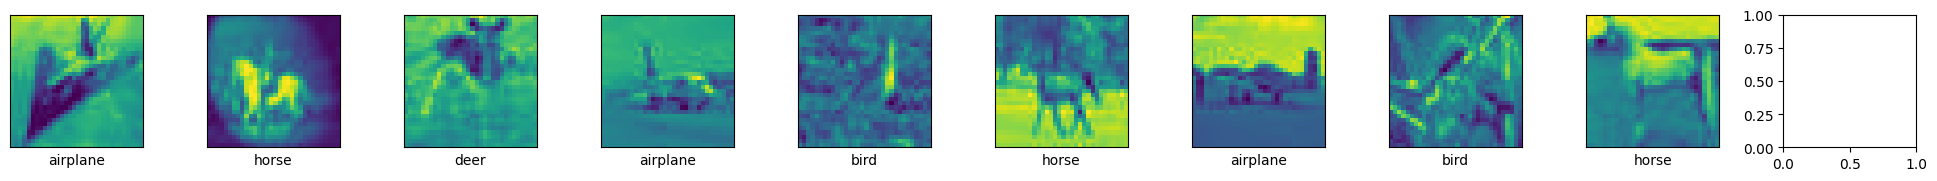

In [5]:
random.shuffle(train_data)

plt.figure(figsize=(25,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_data[i][0])
    plt.xlabel(categories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [6]:
X=[]
Y=[]

for img,label in train_data:
    X.append(img)
    Y.append(class_num)
print(len(X),len(Y)) 

50000 50000


In [9]:
kf = KFold(n_splits=5, shuffle=True)

for train_indices, test_indices in kf.split(X):
    train_set = [X[i] for i in train_indices]
    distances = []
    
    for test_img in [X[i] for i in test_indices]:
        r = []
        for train_img in train_set:
            sub = np.sum(np.abs(test_img - train_img))
            r.append(sub)
        distances.append(r)
        
    
    print(distances)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'